# Problem 1 Using Deep Neural Network

**Introduction:**
Bangla (Bengali) is the second most spoken language in India. It ranks fifth
in Asia and it is also in the top ten spoken languages in the world. So, a
huge number of people depend on this language for their day to day communication. Therefore, automatic recognition of Bengali handwritten characters and numeral digits are needed to be digitized for making the communication smoother. Many research works and models have been proposed to recognize Bengali handwritten characters and numeral digits so far, but still, a huge scopeis there to improve this task in terms of accuracy and applicability. 

Images of handwritten digits are different from natural images as the orientation of a digit, as well as similarity of features of different digits, makes confusion. Before we have this used this experiment using logistic regression. But in here, we will use deep neural network. Using this model, it will increase the accuracy. It provides a better performance.

In this notebook we will be exploring  different bengali numerals dataset and use to classify these digits. We will be using the following two datasets in these notebook.
*   Bengali.AI NumtaDB
*   Ekush 

Here are the corresponding bn-eng numerals representation.

*   ০ , ১ , ২ , ৩ , ৪ , ৫ , ৬ , ৭ , ৮ , ৯
*   0 ,  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9



In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
PATH = 'F:/CSE_4_2_Folder/Soft Computing Lab/namta/'
os.listdir(PATH)

['assignment1_mod1.pkl',
 'assignment1_mod2.pkl',
 'assignment1_mod3.pkl',
 'assignment1_model1.pkl',
 'testing-a',
 'testing-all-corrected',
 'testing-auga',
 'testing-augc',
 'testing-b',
 'testing-c',
 'testing-d',
 'testing-e',
 'testing-f',
 'train1',
 'train10',
 'train12',
 'train13',
 'train2',
 'train3',
 'train4',
 'train8',
 'train9',
 'training-a',
 'training-a.csv',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

In [ ]:
def showRawTrainingSamples(csv_filename):# sb csv file ki ki col e  type dekhacche
    df = pd.read_csv(PATH + csv_filename)
    print(csv_filename)
    print(df.columns)
    return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')


training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
#here i make a function for taking filename and digit from csv file.
def dropColumns(csv_file):
    csv_file = csv_file[['filename', 'digit']]
    print(csv_file)
    print(csv_file.iloc[:5, :])   
    print("=============================")
    return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

In [ ]:
total_csv = [a_csv,b_csv, c_csv, d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


In [ ]:
TRAIN_PATH = 'F:/CSE_4_2_Folder/Soft Computing Lab/namta/train15'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
    src = PATH + folder_name + '/'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, TRAIN_PATH) 

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  72045


# Loading Bangla Digit Dataset

- **totaldata:** 72045
- **minibatch:** 220
  - Number of examples in **1** iteration

- **iterations:** 10000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 10000 \div \frac{72045}{220} = 30$

# Changing the hyperparameter for the first try

In [ ]:
# Hyperparameters

batch_size = 220
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 250 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

30
Train dataloader:295
Test dataloader:33
Iteration: 500. Loss: 1.700404167175293. Accuracy: 41.24097723486952
Iteration: 1000. Loss: 1.68721604347229. Accuracy: 50.22209883398112
Iteration: 1500. Loss: 1.2782448530197144. Accuracy: 54.45585785674625
Iteration: 2000. Loss: 1.2811039686203003. Accuracy: 60.10549694614103
Iteration: 2500. Loss: 1.1274889707565308. Accuracy: 61.299278178789564
Iteration: 3000. Loss: 1.0414632558822632. Accuracy: 65.17212659633537
Iteration: 3500. Loss: 0.9663658142089844. Accuracy: 68.33703498056636
Iteration: 4000. Loss: 0.850073516368866. Accuracy: 69.07273736812881
Iteration: 4500. Loss: 0.9185014963150024. Accuracy: 68.48972792892837
Iteration: 5000. Loss: 0.7790033221244812. Accuracy: 73.8895058300944
Iteration: 5500. Loss: 0.6686756014823914. Accuracy: 75.4858411993337
Iteration: 6000. Loss: 0.6643067598342896. Accuracy: 74.6529705719045
Iteration: 6500. Loss: 0.738071858882904. Accuracy: 76.90172126596336
Iteration: 7000. Loss: 0.6662189364433289.

# Save model

In [ ]:
#settings 1
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'assignment1_model6.pkl') 

# Testing loaded model with digits:

[1.700404167175293, 1.68721604347229, 1.2782448530197144, 1.2811039686203003, 1.1274889707565308, 1.0414632558822632, 0.9663658142089844, 0.850073516368866, 0.9185014963150024, 0.7790033221244812, 0.6686756014823914, 0.6643067598342896, 0.738071858882904, 0.6662189364433289, 0.606345534324646, 0.6234821677207947, 0.6845114827156067]


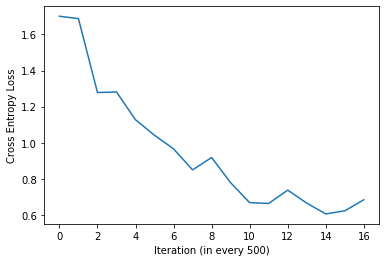

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

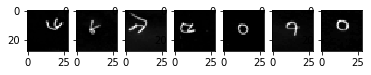

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()

# Loading Bangla Digit Dataset

- **totaldata:** 72045
- **minibatch:** 210
  - Number of examples in **1** iteration

- **iterations:** 9000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 90000 \div \frac{72045}{210} = 26$

# Changing the hyperparameter for second try:

In [ ]:
# Hyperparameters

batch_size = 210
num_iters = 9000
input_dim = 28*28 # num_features = 784
num_hidden = 250 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

26
Train dataloader:309
Test dataloader:35
Iteration: 500. Loss: 1.706512212753296. Accuracy: 40.64408661854525
Iteration: 1000. Loss: 1.6381065845489502. Accuracy: 48.917268184342035
Iteration: 1500. Loss: 1.4601004123687744. Accuracy: 55.774569683509164
Iteration: 2000. Loss: 1.1868953704833984. Accuracy: 58.48139922265408
Iteration: 2500. Loss: 1.1576603651046753. Accuracy: 61.64630760688507
Iteration: 3000. Loss: 1.0425877571105957. Accuracy: 64.21432537479178
Iteration: 3500. Loss: 0.8700122833251953. Accuracy: 68.42032204330927
Iteration: 4000. Loss: 0.9110303521156311. Accuracy: 67.36535258189895
Iteration: 4500. Loss: 0.6872259378433228. Accuracy: 70.46085508051083
Iteration: 5000. Loss: 0.7651466131210327. Accuracy: 73.66740699611327
Iteration: 5500. Loss: 0.768509030342102. Accuracy: 72.26540810660744
Iteration: 6000. Loss: 0.8919311761856079. Accuracy: 75.97168239866741
Iteration: 6500. Loss: 0.5674563646316528. Accuracy: 74.41699056079956
Iteration: 7000. Loss: 0.7283282876

# Save the model

In [ ]:
#settings 2
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'assignment1_model7.pkl') 

# Testing loaded model with digits:

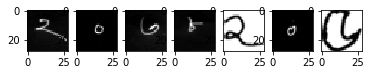

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()

[1.706512212753296, 1.6381065845489502, 1.4601004123687744, 1.1868953704833984, 1.1576603651046753, 1.0425877571105957, 0.8700122833251953, 0.9110303521156311, 0.6872259378433228, 0.7651466131210327, 0.768509030342102, 0.8919311761856079, 0.5674563646316528, 0.728328287601471, 0.7912507653236389, 0.5919965505599976]


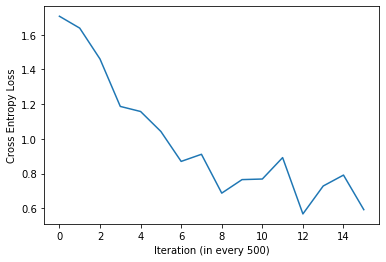

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Changing the hyperparameter for third try:

# Loading Bangla Digit Dataset

- **totaldata:** 72045
- **minibatch:** 220
  - Number of examples in **1** iteration

- **iterations:** 9000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 9000 \div \frac{72045}{220} = 27$

In [ ]:
# Hyperparameters

batch_size = 220
num_iters = 9000
input_dim = 28*28 # num_features = 784
num_hidden = 250 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

27
Train dataloader:295
Test dataloader:33
Iteration: 500. Loss: 1.6665781736373901. Accuracy: 43.795113825652415
Iteration: 1000. Loss: 1.483166217803955. Accuracy: 49.403109383675734
Iteration: 1500. Loss: 1.225946068763733. Accuracy: 55.49694614103276
Iteration: 2000. Loss: 1.2014485597610474. Accuracy: 58.3564686285397
Iteration: 2500. Loss: 1.0538617372512817. Accuracy: 62.46529705719045
Iteration: 3000. Loss: 1.0474109649658203. Accuracy: 62.89561354802887
Iteration: 3500. Loss: 1.131105899810791. Accuracy: 67.19877845641311
Iteration: 4000. Loss: 0.7916216254234314. Accuracy: 69.91948917268185
Iteration: 4500. Loss: 0.8378718495368958. Accuracy: 69.10049972237645
Iteration: 5000. Loss: 0.7933202385902405. Accuracy: 72.07107162687396
Iteration: 5500. Loss: 0.7922217845916748. Accuracy: 74.87506940588563
Iteration: 6000. Loss: 0.7003310918807983. Accuracy: 74.22265408106607
Iteration: 6500. Loss: 0.7076928019523621. Accuracy: 74.70849528039977
Iteration: 7000. Loss: 0.577954947948

# Save model

In [ ]:
#settings 3
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'assignment1_model8.pkl') 

# Testing loaded model with digits:

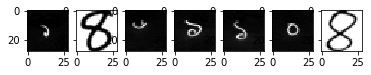

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()

[1.6665781736373901, 1.483166217803955, 1.225946068763733, 1.2014485597610474, 1.0538617372512817, 1.0474109649658203, 1.131105899810791, 0.7916216254234314, 0.8378718495368958, 0.7933202385902405, 0.7922217845916748, 0.7003310918807983, 0.7076928019523621, 0.5779549479484558, 0.686365008354187]


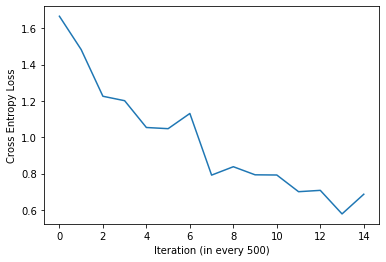

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

# Changing the hyperparameters for fourth try:

# Loading Bangla Digit Dataset

- **totaldata:** 72045
- **minibatch:** 225
  - Number of examples in **1** iteration

- **iterations:** 10000
  - *1 iteration: one mini-batch forward & backward pass. That means a parameter (wights and biases) update.*

- **epochs**
  - 1 epoch: running through the whole dataset once
  - $epochs = iterations \div \frac{totaldata}{minibatch} = 10000 \div \frac{72045}{225} = 31$

In [ ]:
# Hyperparameters

batch_size = 225
num_iters = 10000
input_dim = 28*28 # num_features = 784
num_hidden = 250 # num of hidden nodes
output_dim = 10

learning_rate = 0.001  # More power so we can learn faster! previously it was 0.001

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU6()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU6()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas
# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)
# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

31
Train dataloader:289
Test dataloader:33
Iteration: 500. Loss: 1.6533063650131226. Accuracy: 40.43586896168795
Iteration: 1000. Loss: 1.416408658027649. Accuracy: 49.90283176013326
Iteration: 1500. Loss: 1.3793079853057861. Accuracy: 54.330927262631874
Iteration: 2000. Loss: 1.2871673107147217. Accuracy: 57.16268739589117
Iteration: 2500. Loss: 1.133628487586975. Accuracy: 62.93725707940033
Iteration: 3000. Loss: 0.9746496081352234. Accuracy: 65.53303720155469
Iteration: 3500. Loss: 0.9334429502487183. Accuracy: 68.62853970016657
Iteration: 4000. Loss: 0.8798841834068298. Accuracy: 69.94725152692948
Iteration: 4500. Loss: 0.8383423686027527. Accuracy: 70.48861743475847
Iteration: 5000. Loss: 0.8391940593719482. Accuracy: 72.1682398667407
Iteration: 5500. Loss: 0.7501221299171448. Accuracy: 73.98667406996113
Iteration: 6000. Loss: 0.8000629544258118. Accuracy: 74.8611882287618
Iteration: 6500. Loss: 0.6600285768508911. Accuracy: 74.38922820655192
Iteration: 7000. Loss: 0.6324756145477

# Save model

In [ ]:
#settings 4
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), PATH + 'assignment1_model9.pkl') 

# Testing loaded model with digits:

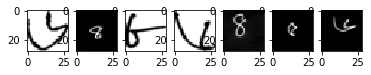

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 7)
for i in range(7):
    ax[i].imshow(images[i].view(28,28), cmap=matplotlib.cm.binary)

plt.show()

[1.6533063650131226, 1.416408658027649, 1.3793079853057861, 1.2871673107147217, 1.133628487586975, 0.9746496081352234, 0.9334429502487183, 0.8798841834068298, 0.8383423686027527, 0.8391940593719482, 0.7501221299171448, 0.8000629544258118, 0.6600285768508911, 0.6324756145477295, 0.6444560885429382, 0.5178011655807495, 0.5111101269721985]


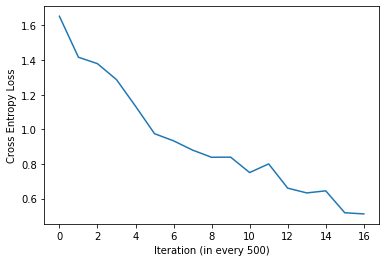

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()


# Result Analysis


**All results showing in the table:-**

|                | First Try     | Second Try    | Third Try | Fourth Try |
| :------------- | :----------: | -----------: |-----------: |-----------: |
|  Batch Size | 220  | 210    |220| 225|
| Num of Iters   | 10000 | 9000 |9000 | 10000|
|Number of hidden layer| 250|250|250|250|
|Optimizer|Adamax|Adamax|Adamax|Adamax|Adamax|
|  Learning Rate | 0.001   | 0.001    |0.001| 0.001|
|  Accuracy | 79.59%  | 77.22% | 77.37% | 78.76%|
| Loss| 0.68 | 0.59 | 0.69| 0.51|


**Results:**
From the above table, we can see that we can get a good accuracy by fixing all the hyperparameters and increasing the batch size and number of iterations. We have used the Adamax optimizer here, which provides better performance. Using a deep neural network, we can secure 79.59% accuracy, which is quite good. Before using logistic regression, we could not get much accuracy then. We use a deep neural network, where there are multiple hidden layers, and activation functions improve accuracy.

**Conclusion:**
We presented a deep neural network-based Bangla digit recognition method for a typical and challenging dataset in this issue. Compared to other unbiased datasets, we obtained 79.59% percent research precision, which is a positive outcome for the massive and impartial NumtaDB dataset. We discovered that using only a deep classification model to improve efficiency is ineffective. Before preparation, all types of image preprocessing are essential. We use some preprocessing techniques for blurry and noisy videos, but they are insufficient for high efficiency.Using CNN model, we can get more better performance.